In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
train_data = pd.read_csv("titanic/train.csv")
test_data = pd.read_csv("titanic/test.csv")

In [9]:
train_data = train_data.set_index("PassengerId")
test_data = test_data.set_index("PassengerId")

In [10]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data preparation

In [11]:
train_data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [13]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699113,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526507,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.416700,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

numeric_attribtes = ['Age', 'SibSp', 'Parch', 'Fare']
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")), # change nan values with median
    ('scaler', StandardScaler()) # scale
])

In [15]:
from sklearn.preprocessing import OneHotEncoder
categorical_attributes = ['Sex', 'Pclass', 'Embarked']
att_pipeline = Pipeline([
    ("scaler", SimpleImputer(strategy="most_frequent")), # change nan values with most frequent
    ("cat_encoder", OneHotEncoder(sparse=False)) # ttransfer categorical valeues into numerical
])


In [16]:
from sklearn.compose import ColumnTransformer

preprocessing_pipeline = ColumnTransformer(
    transformers=[
        ("num", num_pipeline, numeric_attribtes),
        ("cat", att_pipeline, categorical_attributes)
    ]
)

In [17]:
X_train = preprocessing_pipeline.fit_transform(train_data[numeric_attribtes + categorical_attributes])
y_train = train_data["Survived"]

X_test = preprocessing_pipeline.fit_transform(test_data[numeric_attribtes + categorical_attributes])


/Users/matus/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/matus/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [84]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=32, random_state=42)

In [85]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=32, random_state=42)

In [86]:
y_pred = rf_classifier.predict(X_train) # predict on train  datas

In [87]:
from sklearn.model_selection import cross_val_score
rf_classifier_score = cross_val_score(rf_classifier, X_train, y_train, cv=10)
rf_classifier_score.mean()

0.8115355805243445

In [88]:

from sklearn.svm import SVC
svm_clf = SVC(gamma="auto", random_state=42)
svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
svm_scores.mean()

0.8249313358302123

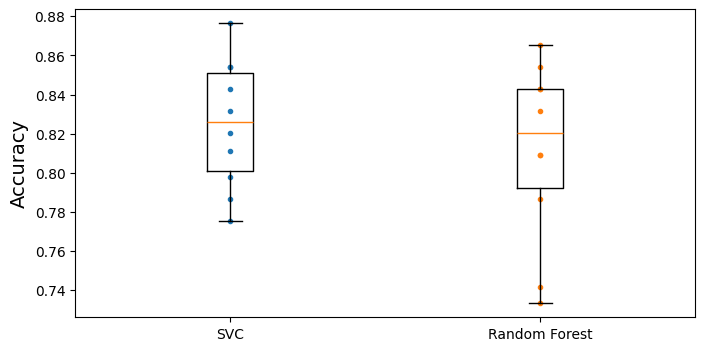

In [90]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, rf_classifier_score, ".")
plt.boxplot([svm_scores, rf_classifier_score], labels=("SVC","Random Forest"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()